In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv(r"C:\Users\hp\Desktop\Product Analysis\upworthy-archive-confirmatory-packages-03.12.2020.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_28208\470191221.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\hp\Desktop\Product Analysis\upworthy-archive-confirmatory-packages-03.12.2020.csv")


In [4]:
df.shape
df.head()

,Unnamed: 0,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,11,2014-11-20 11:33:26.475,2016-04-02 16:25:54.046,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,"Let’s See … Hire Cops, Pay Teachers, Buy Books...",<p>Iff you start with the basic fact that inno...,let-s-see-hire-cops-pay-teachers-buy-books-for...,546dce659ad54ec65b000041,3118,8,0.1,False,False,NaN,NaN,201446
1,12,2014-11-20 15:00:01.032,2016-04-02 16:25:54.128,546e01d626714c6c4400004e,Things that matter. Pass 'em on.,People Sent This Lesbian Questions And Her Rai...,<p>I'll be honest. I've wondered about 7.</p>,people-sent-this-lesbian-questions-and-her-rai...,546d1b4bfd3617f091000041,4587,130,55.8,False,False,NaN,NaN,201446
2,13,2014-11-20 11:33:51.973,2016-04-02 16:25:54.069,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,$3 Million Is What It Takes For A State To Leg...,<p>Iff you start with the basic fact that inno...,3-million-is-what-it-takes-for-a-state-to-lega...,546dce659ad54ec65b000041,3017,19,26.9,False,False,NaN,NaN,201446
3,14,2014-11-20 11:34:12.107,2016-04-02 16:25:54.049,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,The Fact That Sometimes Innocent People Are Ex...,<p>Iff you start with the basic fact that inno...,the-fact-that-sometimes-innocent-people-are-ex...,546dce659ad54ec65b000041,2974,26,100.0,True,False,NaN,NaN,201446
4,15,2014-11-20 11:34:33.935,2016-04-02 16:25:54.072,546dd17e26714c82cc00001c,Things that matter. Pass 'em on.,Reason #351 To End The Death Penalty: It Costs...,<p>Iff you start with the basic fact that inno...,reason-351-to-end-the-death-penalty-it-costs-3...,546dce659ad54ec65b000041,3050,10,0.2,False,False,NaN,NaN,201446


In [5]:


df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
# Drop useless columns
df.drop(columns=["square", "share_text", "excerpt", "lede", "eyecatcher_id"], inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Check data types
print(df.dtypes)

# Convert created_at & updated_at to datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['updated_at'] = pd.to_datetime(df['updated_at'], errors='coerce')

# Quick look at cleaned data
print(df.head())
print(df.info())

created_at               object
updated_at               object
clickability_test_id     object
headline                 object
slug                     object
impressions               int64
clicks                    int64
significance            float64
first_place                bool
winner                     bool
test_week                 int64
dtype: object
               created_at              updated_at      clickability_test_id  \
0 2014-11-20 11:33:26.475 2016-04-02 16:25:54.046  546dd17e26714c82cc00001c   
1 2014-11-20 15:00:01.032 2016-04-02 16:25:54.128  546e01d626714c6c4400004e   
2 2014-11-20 11:33:51.973 2016-04-02 16:25:54.069  546dd17e26714c82cc00001c   
3 2014-11-20 11:34:12.107 2016-04-02 16:25:54.049  546dd17e26714c82cc00001c   
4 2014-11-20 11:34:33.935 2016-04-02 16:25:54.072  546dd17e26714c82cc00001c   

                                            headline  \
0  Let’s See … Hire Cops, Pay Teachers, Buy Books...   
1  People Sent This Lesbian Questions And Her R

In [7]:
# Calculate CTR (Click Through Rate)
df['CTR'] = df['clicks'] / df['impressions']

# Check if CTR calculation worked
print(df[['headline', 'impressions', 'clicks', 'CTR']].head(10))

# Quick summary stats
print(df['CTR'].describe())


                                            headline  impressions  clicks  \
0  Let’s See … Hire Cops, Pay Teachers, Buy Books...         3118       8   
1  People Sent This Lesbian Questions And Her Rai...         4587     130   
2  $3 Million Is What It Takes For A State To Leg...         3017      19   
3  The Fact That Sometimes Innocent People Are Ex...         2974      26   
4  Reason #351 To End The Death Penalty: It Costs...         3050      10   
5  I Was Already Against The Death Penalty, But N...         3061      20   
6  I'll Say It: It's Not OK For States To Legally...         2997      20   
7  The Fact That Sometimes Innocent People Are Ex...         2959      29   
8  The Fact That Sometimes Innocent People Are Ex...         3086      16   
9  The Fact That Sometimes Innocent People Are Ex...         3068      16   

        CTR  
0  0.002566  
1  0.028341  
2  0.006298  
3  0.008742  
4  0.003279  
5  0.006534  
6  0.006673  
7  0.009801  
8  0.005185  
9  0.005215 

In [8]:
# Total counts for funnel stages
total_impressions = df['impressions'].sum()
total_clicks = df['clicks'].sum()

# Compute funnel conversion rate
funnel = pd.DataFrame({
    "Stage": ["Impressions", "Clicks"],
    "Count": [total_impressions, total_clicks]
})

funnel['Conversion_Rate'] = funnel['Count'] / funnel['Count'].iloc[0]  # relative to impressions

print(funnel)


         Stage      Count  Conversion_Rate
0  Impressions  376529158         1.000000
1       Clicks    5741684         0.015249


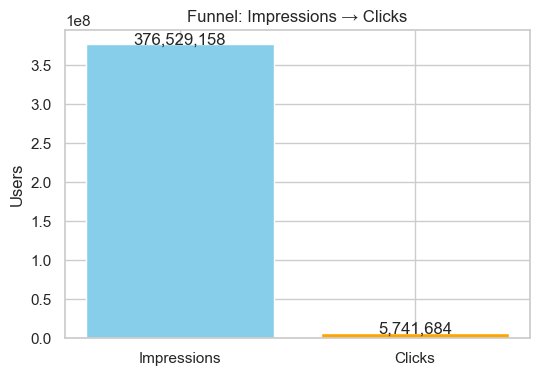

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(funnel['Stage'], funnel['Count'], color=['skyblue','orange'])
for i, val in enumerate(funnel['Count']):
    plt.text(i, val+500, f"{val:,}", ha='center', fontsize=12)
plt.title("Funnel: Impressions → Clicks")
plt.ylabel("Users")
plt.show()


In [10]:
 #A/B Testing (All Experiments)
# ----------------------------
def ab_test(group):
    if len(group) < 2:
        return None  # not enough variations
    winners = []
    for i in range(len(group)):
        for j in range(i+1, len(group)):
            clicks_A = group.iloc[i]['clicks']
            imps_A = group.iloc[i]['impressions']
            clicks_B = group.iloc[j]['clicks']
            imps_B = group.iloc[j]['impressions']

            ctr_A = clicks_A / imps_A
            ctr_B = clicks_B / imps_B

            # Z-test for proportions
            p_pool = (clicks_A + clicks_B) / (imps_A + imps_B)
            se = np.sqrt(p_pool * (1 - p_pool) * (1/imps_A + 1/imps_B))
            z_score = (ctr_A - ctr_B) / se
            p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # two-tailed

            if p_value < 0.05:
                winner = group.iloc[i]['headline'] if ctr_A > ctr_B else group.iloc[j]['headline']
                winners.append({
                    "test_id": group.iloc[i]['clickability_test_id'],
                    "winner_headline": winner,
                    "CTR_winner": max(ctr_A, ctr_B),
                    "CTR_loser": min(ctr_A, ctr_B),
                    "p_value": p_value
                })
    return winners

In [11]:
import scipy.stats as stats
all_winners = []
for test_id, group in df.groupby('clickability_test_id'):
    result = ab_test(group)
    if result:
        all_winners.extend(result)

winners_df = pd.DataFrame(all_winners)
print("Top winning headlines:")
print(winners_df.sort_values(by='CTR_winner', ascending=False).head(10))

C:\Users\hp\AppData\Local\Temp\ipykernel_28208\2215315446.py:20: RuntimeWarning: invalid value encountered in scalar divide
  z_score = (ctr_A - ctr_B) / se


Top winning headlines:
                        test_id  \
4452   51f7ff08f114bc18ba007025   
4450   51f7ff08f114bc18ba007025   
4451   51f7ff08f114bc18ba007025   
52054  5535537b646339001c260000   
52052  5535537b646339001c260000   
52060  5535537b646339001c260000   
52058  5535537b646339001c260000   
52056  5535537b646339001c260000   
52059  5535537b646339001c260000   
4797   520268fddb7593ebfb0092ff   

                                         winner_headline  CTR_winner  \
4452   Her Dad Thinks Being Gay Was Her Choice. The W...    0.183401   
4450   Her Dad Thinks Being Gay Was Her Choice. The W...    0.183401   
4451   Her Dad Thinks Being Gay Was Her Choice. The W...    0.183401   
52054  Canceling out the harmful effects of sitting i...    0.179671   
52052  Canceling out the harmful effects of sitting i...    0.179671   
52060  Canceling out the harmful effects of sitting i...    0.179671   
52058  Canceling out the harmful effects of sitting i...    0.179671   
52056  Cancelin

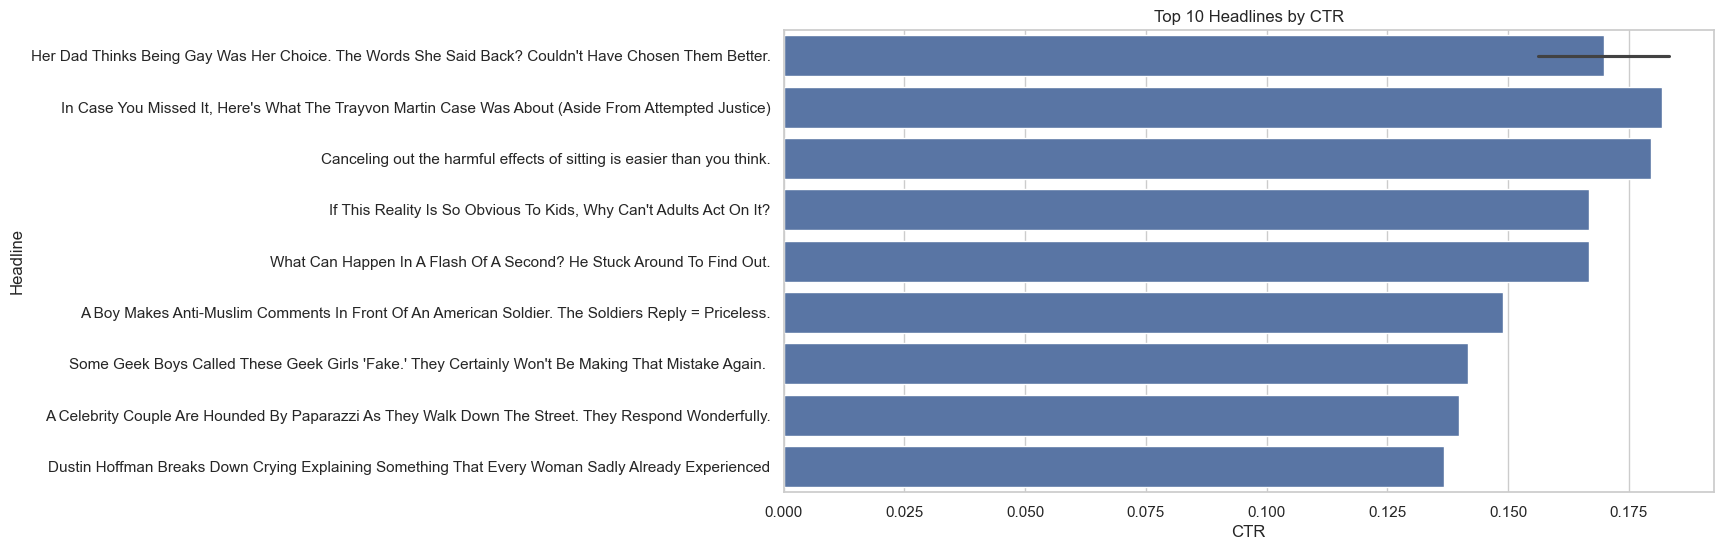

In [12]:
top_headlines = df.sort_values(by='CTR', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='CTR', y='headline', data=top_headlines)
plt.title("Top 10 Headlines by CTR")
plt.xlabel("CTR")
plt.ylabel("Headline")
plt.show()

In [13]:
# 1️⃣ Export funnel data
funnel.to_csv("funnel_data.csv", index=False)
print("Funnel data exported as 'funnel_data.csv'")

# 2️⃣ Export A/B test winners
winners_df.to_csv("ab_test_winners.csv", index=False)
print("A/B test winners exported as 'ab_test_winners.csv'")

# 3️⃣ Optional: Top headlines by CTR
top_headlines = df.sort_values(by='CTR', ascending=False).head(50)
top_headlines.to_csv("top_headlines.csv", index=False)
print("Top headlines exported as 'top_headlines.csv'")


Funnel data exported as 'funnel_data.csv'
A/B test winners exported as 'ab_test_winners.csv'
Top headlines exported as 'top_headlines.csv'


In [16]:
df.to_csv("upworthy_clean.csv", index=False)
